# **MÓDULO 40 - Exercício - Aplicando SVM**

Nessa atividade vocês usarão uma base já connhecida, a base de propensão a compra de carros. A mesma que também usamos na tarefa de XGboost!


In [7]:
from sklearn.svm import SVC
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# 1. Carrega a base de dados, verifique os tipos de dados, dados faltantes e drop a coluna ID.


In [10]:
#SEU CÓDIGO AQUI
base = pd.read_csv('CARRO_CLIENTES.csv')

In [12]:
base

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0
...,...,...,...,...,...
995,863,Male,38,59000,0
996,800,Female,47,23500,0
997,407,Female,28,138500,1
998,299,Female,48,134000,1


In [14]:
base.dtypes

User ID          int64
Gender          object
Age              int64
AnnualSalary     int64
Purchased        int64
dtype: object

In [16]:
base.isnull().sum()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [18]:
base['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [20]:
label_encoder = LabelEncoder()

base['Gender_encoded'] = label_encoder.fit_transform(base['Gender'])

base.drop(columns=['Gender'], inplace=True)

base.drop(columns=['User ID'], inplace=True)

In [22]:
base.dtypes

Age               int64
AnnualSalary      int64
Purchased         int64
Gender_encoded    int32
dtype: object

In [24]:
distribuicao = base['Purchased'].value_counts()
print(distribuicao)

Purchased
0    598
1    402
Name: count, dtype: int64


In [26]:
base

,Age,AnnualSalary,Purchased,Gender_encoded
0,35,20000,0,1
1,40,43500,0,1
2,49,74000,0,1
3,40,107500,1,1
4,25,79000,0,1
...,...,...,...,...
995,38,59000,0,1
996,47,23500,0,0
997,28,138500,1,0
998,48,134000,1,0


# 2. Aplique o Label Encoder para a coluna Gender e exclua a coluna categórica.

In [29]:
#SEU CÓDIGO AQUI

Feito no enunciado 1.

# 3. Faça a matriz de correlação e analise as váriaveis que parecem ter maior correlação com a váriavel target.

<Axes: >

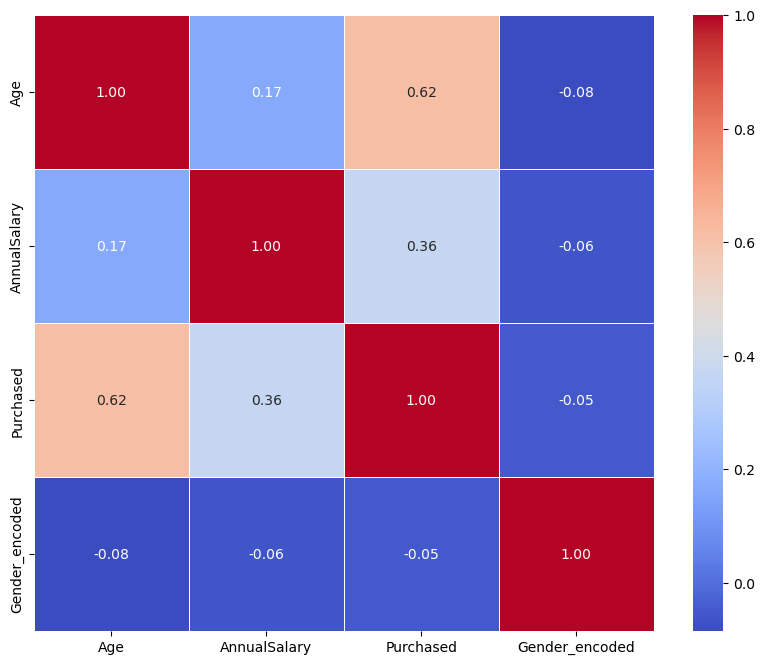

In [33]:
#SEU CÓDIGO AQUI
correlation_matrix = base.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

A variável 'Age' é a que apresenta a maior correlação com a variável target 'Purchased', seguido da variável 'AnnualSalary', e com a variável 'Gender' tendo muito pouca correlação.

# 4. Faça a separação da base em X e Y e em seguida nas bases de treino e teste.

In [37]:
#SEU CÓDIGO AQUI
X = base.drop(columns=['Purchased'])
Y = base['Purchased']

In [39]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [41]:
X

,Age,AnnualSalary,Gender_encoded
0,35,20000,1
1,40,43500,1
2,49,74000,1
3,40,107500,1
4,25,79000,1
...,...,...,...
995,38,59000,1
996,47,23500,0
997,28,138500,0
998,48,134000,0


In [43]:
Y

0      0
1      0
2      0
3      1
4      0
      ..
995    0
996    0
997    1
998    1
999    0
Name: Purchased, Length: 1000, dtype: int64

In [45]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Todos passos até aqui vocês realizaram na tarefa anterior também!**

# 5. Treino o modelo SVM com sua base de treino.
Esse modelo deve ser treinado usando o kernel linear.

In [48]:
#SEU CÓDIGO AQUI
svm_model = SVC(kernel =  'linear', random_state = 1, C = 1.0)
svm_model.fit(X_train_scaled,Y_train)

SVC(kernel='linear', random_state=1)

# 6. Realize as previsões para a base de teste e traga a avaliação.

In [51]:
#SEU CÓDIGO AQUI
Y_pred = svm_model.predict(X_test_scaled)
Y_pred

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [53]:
report = classification_report(Y_test, Y_pred)
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
print("Relatório de Classificação:\n", report)
print('Matriz de Confusão:\n', conf_matrix)
print(f'Acurácia: {accuracy:.3f}')

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.77      0.94      0.84       112
           1       0.89      0.64      0.74        88

    accuracy                           0.81       200
   macro avg       0.83      0.79      0.79       200
weighted avg       0.82      0.81      0.80       200

Matriz de Confusão:
 [[105   7]
 [ 32  56]]
Acurácia: 0.805


# 7. Treine um novo modelo SVM com sua base de treino + realize as previsões e avalições.
Esse modelo dedve ser treinado usando o kernel poly.

In [56]:
#SEU CÓDIGO AQUI
svm_model_poly = SVC(kernel =  'poly', random_state = 1, C = 1.0)
svm_model_poly.fit(X_train_scaled,Y_train)

SVC(kernel='poly', random_state=1)

In [58]:
Y_pred_poly = svm_model_poly.predict(X_test_scaled)
Y_pred_poly

array([0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1], dtype=int64)

In [60]:
report = classification_report(Y_test, Y_pred_poly)
accuracy = accuracy_score(Y_test, Y_pred_poly)
conf_matrix = confusion_matrix(Y_test, Y_pred_poly)
print("Relatório de Classificação:\n", report)
print('Matriz de Confusão:\n', conf_matrix)
print(f'Acurácia: {accuracy:.3f}')

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.78      0.95      0.85       112
           1       0.91      0.66      0.76        88

    accuracy                           0.82       200
   macro avg       0.84      0.80      0.81       200
weighted avg       0.84      0.82      0.81       200

Matriz de Confusão:
 [[106   6]
 [ 30  58]]
Acurácia: 0.820


# 8. Qual modelo se saiu melhor? O SVM com kernel linear ou poly? Compare também com o XGboost, da atividade anterior, você obteve melhores previsões com qual dos modelos?

O modelo de SVM com kernel linear se saiu consideravelmente melhor, obtendo uma acurácia de 0.81, enquanto o poly obteve 0.70. Porém, em comparação com o XGboost, os dois foram inferiores, considerando que o XGboost teve uma acurácia de 0.90, bem melhor que os dois.